In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# <font color='blue'> Polynomial Regression</font>

## 1. Polynomials in one variable

<font color='slateblue'> Main idea: Linear combination of different powers of the feature values.

$$\large
P(x):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

What we hope to achieve:

$$\large \mathbb{E}(Y|X=x)\approx \beta_p x^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0$$

IMPORTANT: P(x) is nonlinear in x. However if x is fixed (x is your data) and $\beta$ is the input we have
$$\large
L(\beta):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

is linear in $\beta=(\beta_0,\beta_1,\beta_2,...\beta_p).$

$$\large L(\beta+\gamma)= L(\beta)+L(\gamma)$$

and

$$\large L(c\cdot \beta) = c\cdot L(\beta)$$

for any two vectors $\beta$ and $\gamma$, and any scalar (real number) $c.$


In [1]:
import numpy as np
import operator
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

### The Coefficient of Determination

$$\large R^2:=1-\frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}$$

We can solve for the sum of squared residuals:

$$\large \frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}= 1- R^2$$

so we obtain:

$$\large \sum (residual_i)^2= \sum(y_i-\bar{y})^2\cdot (1-R^2)$$

We got that

$$\Large \text{MSE} = \frac{1}{n}\cdot \sum(y_i-\bar{y})^2\cdot (1-R^2)$$


In [3]:
# here we simulate polynomial data
np.random.seed(123)
x = 2 - 3 * np.random.normal(loc=0,scale=1,size=100)
y = x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 2.5*np.random.normal(-3, 3, 100) # this + is the noise

In [7]:
#x,y

/tmp/ipykernel_127/486059214.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
/tmp/ipykernel_127/486059214.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)


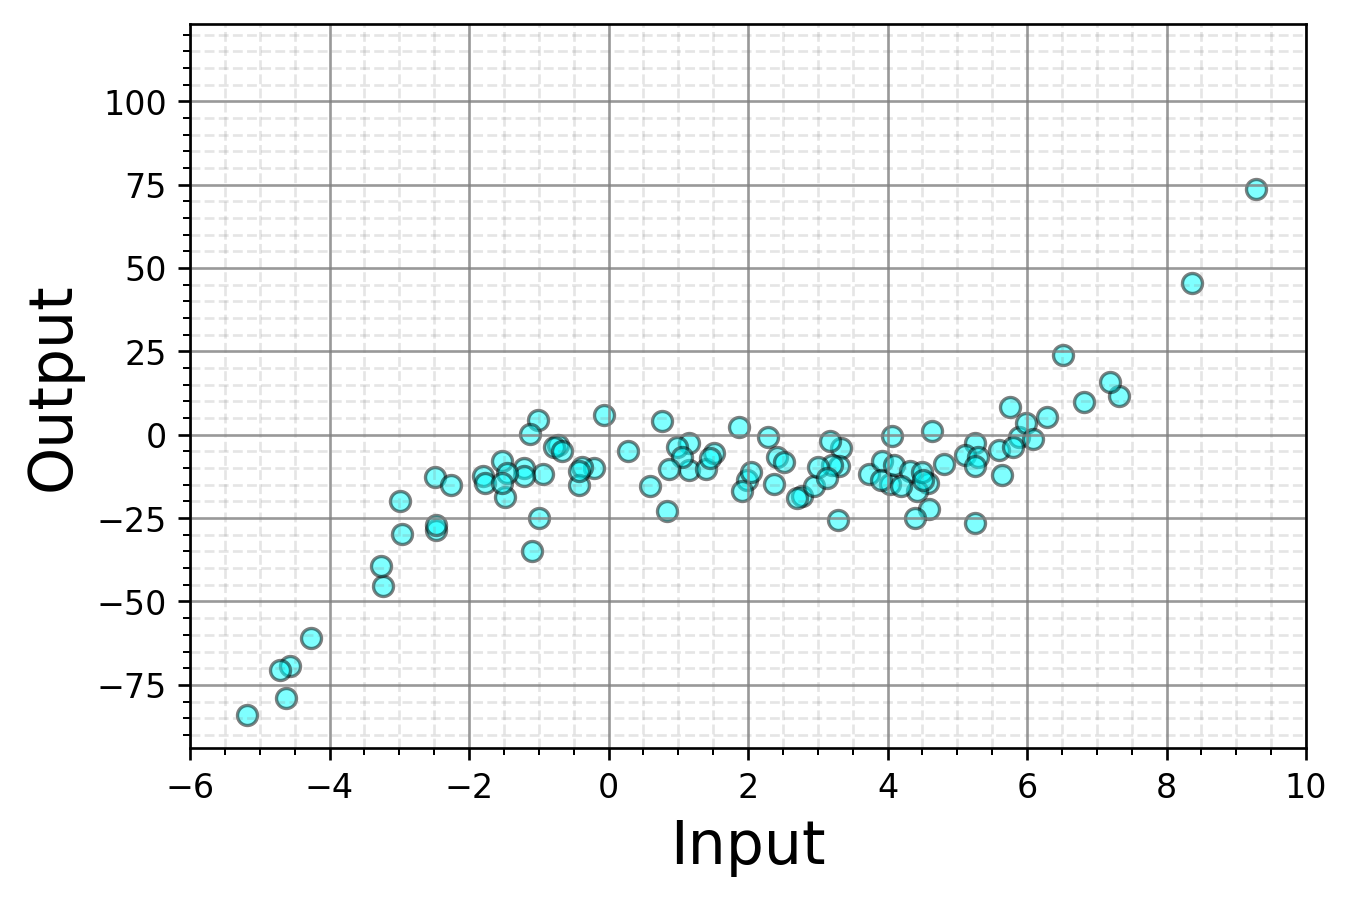

In [10]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

### <font color='red'> Critical Thinking: Is a straight line a good idea for capturing the relationship between x and y?

In [11]:
model = LinearRegression()

/tmp/ipykernel_127/4135555157.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
/tmp/ipykernel_127/4135555157.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)


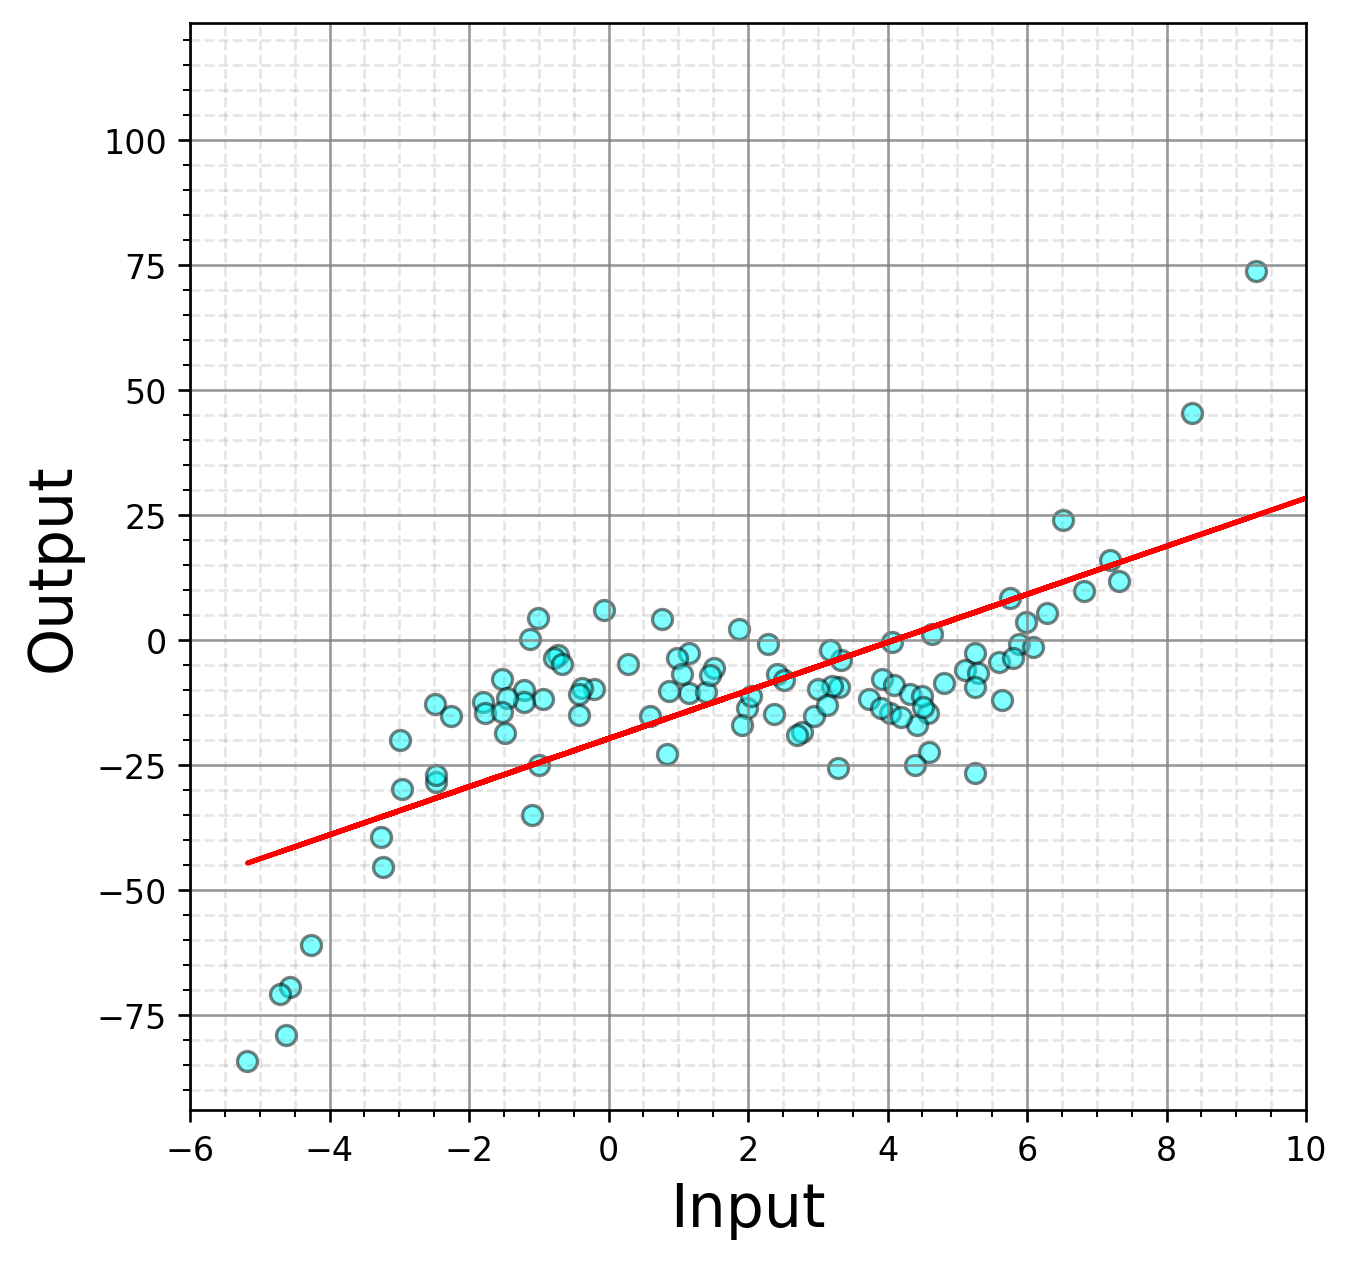

In [12]:
model.fit(x.reshape((-1,1)),y)
y_pred = model.predict(x.reshape((-1,1)))

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (8,8) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.plot(x, y_pred, '-',color='r') # here we plot the line
ax.set_xlim([-6,10]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [13]:
# we want the R2 score (coefficient of determination)
model.score(x.reshape(-1,1),y)

0.4681903341708725

In [25]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x.reshape((-1,1))) # in x_poly we get the polynomial features

In [26]:
x.reshape(-1,1)[:10]

array([[ 5.25689181],
       [-0.99203634],
       [ 1.15106451],
       [ 6.51888414],
       [ 3.73580076],
       [-2.95430961],
       [ 9.28003773],
       [ 3.28673789],
       [-1.79780878],
       [ 4.60022121]])

In [27]:
x_poly[:10,:]#[x**0,x**1,x**2,x**3,x**k]

array([[  1.        ,   5.25689181,  27.6349115 , 145.27373994],
       [  1.        ,  -0.99203634,   0.9841361 ,  -0.97629877],
       [  1.        ,   1.15106451,   1.3249495 ,   1.52510234],
       [  1.        ,   6.51888414,  42.49585045, 277.02552561],
       [  1.        ,   3.73580076,  13.95620729,  52.13760974],
       [  1.        ,  -2.95430961,   8.72794528, -25.78505263],
       [  1.        ,   9.28003773,  86.11910027, 799.18849983],
       [  1.        ,   3.28673789,  10.80264594,  35.50546567],
       [  1.        ,  -1.79780878,   3.2321164 ,  -5.81072722],
       [  1.        ,   4.60022121,  21.16203515,  97.35004288]])

In [28]:
# the model created is linear in weights 
model = LinearRegression()
model.fit(x_poly, y) # so we fit linear regression of polynomial features
y_poly_pred = model.predict(x_poly)

In [29]:
r2 = r2_score(y,y_poly_pred)
print(r2)

0.9065900793800235


/tmp/ipykernel_127/696631777.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
/tmp/ipykernel_127/696631777.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)


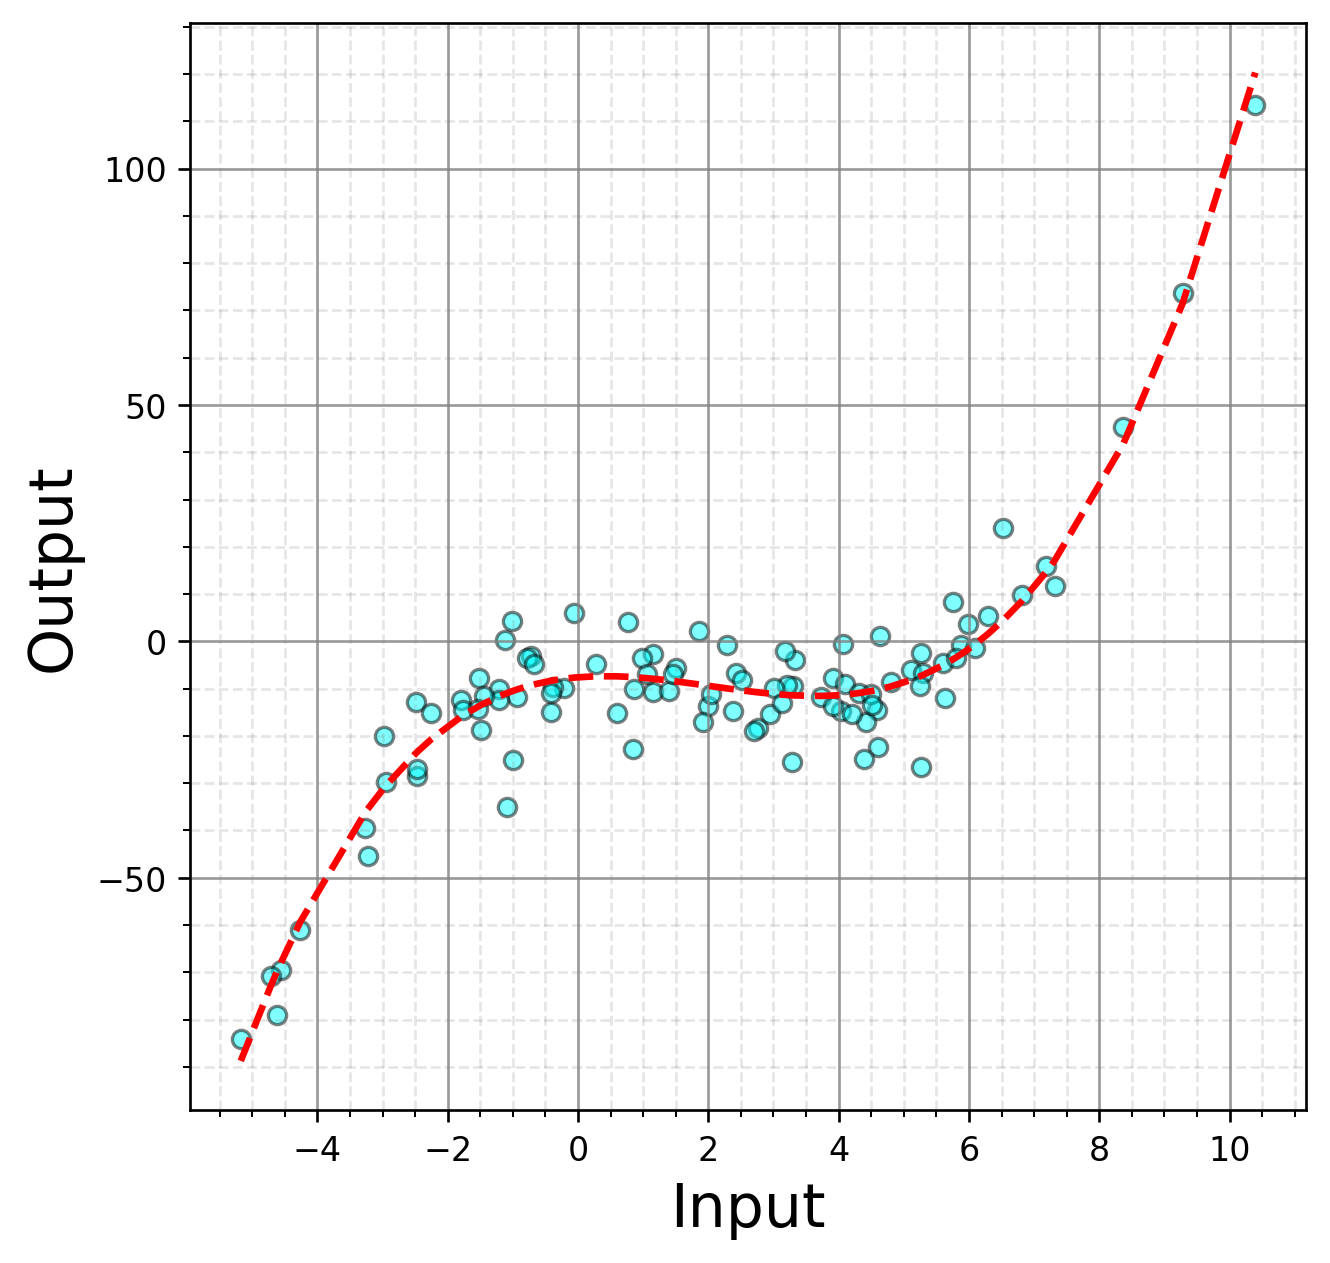

In [30]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
ax.plot(x_sorted, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

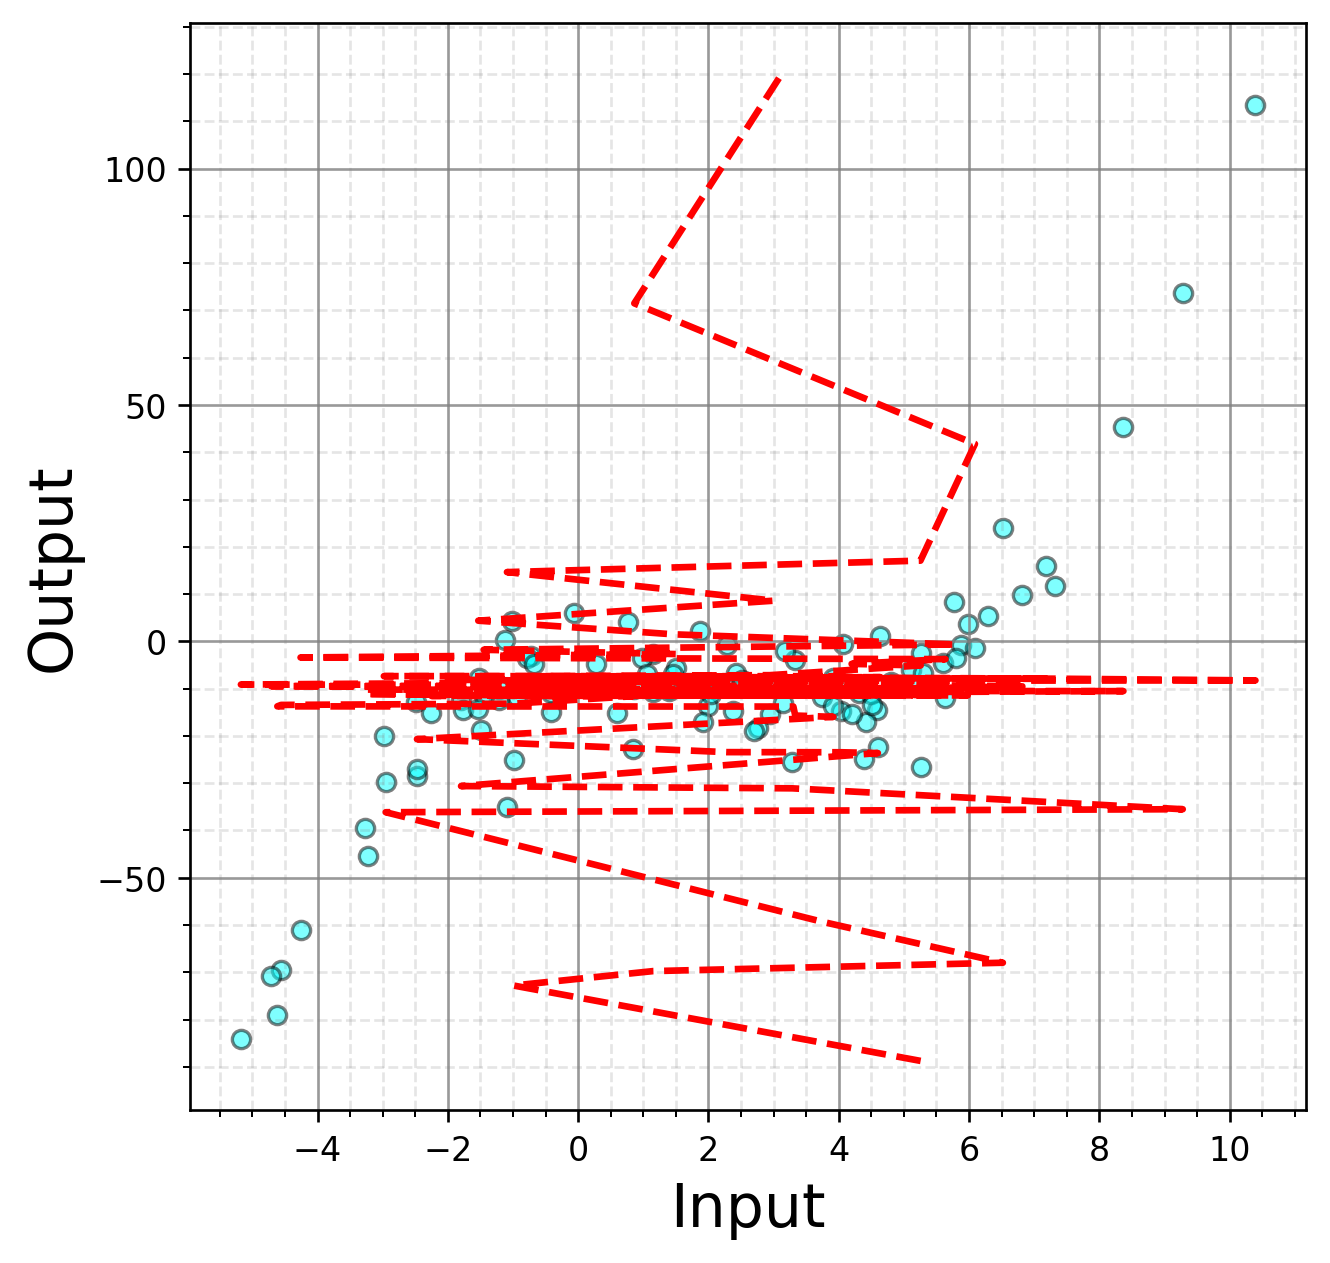

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6)
ax.scatter(x, y, s=30,ec='k',color='cyan',alpha=0.5)
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
#x_sorted, y_poly_pred = zip(*sorted_zip)
ax.plot(x, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

##<font color='red'> In general, a nonlinear function is not always a polynomial. Example: a noisy sine wave</font>

In [31]:
x = np.linspace(0,np.pi,50)
epsilon = np.random.normal(scale=0.2,size=x.shape)
y = np.sin(4*x) + epsilon

/tmp/ipykernel_127/2785064097.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
/tmp/ipykernel_127/2785064097.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)


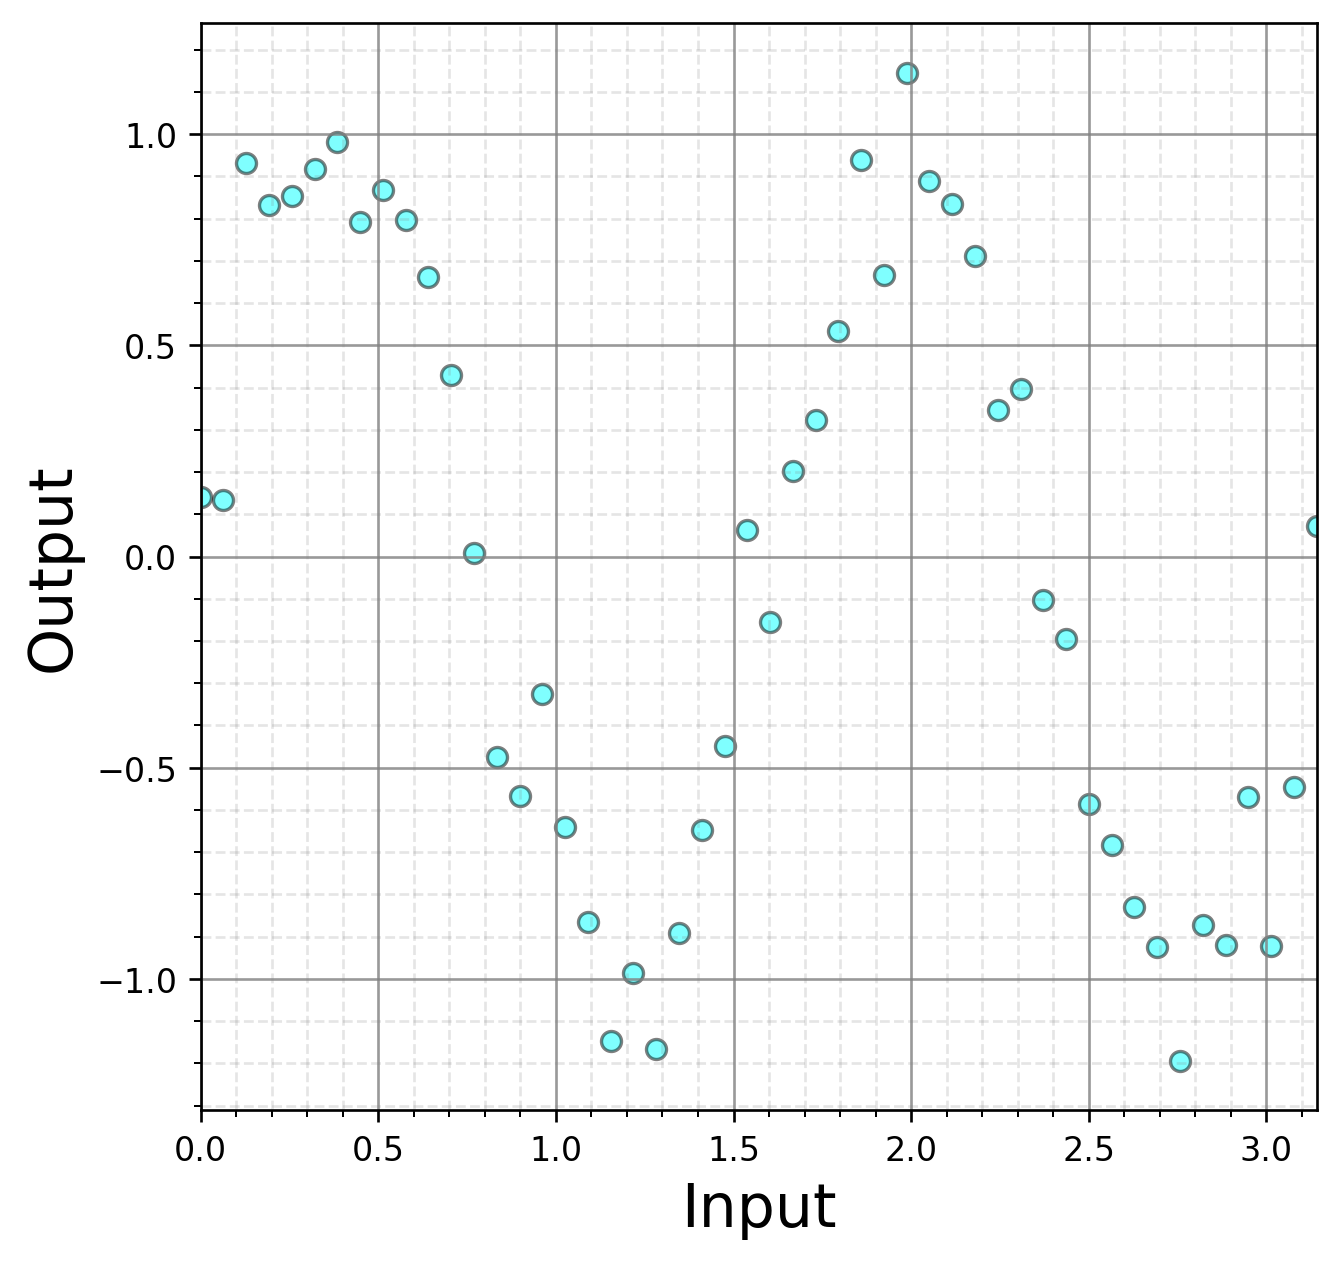

In [32]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (6,6) # here we setup a desired figure size.
ax.scatter(x,y,ec='k',color='cyan',alpha=0.5) # we generate a scatter plot of x and y
ax.set_xlim([0,np.pi]) # we set the bounds for the horizontal axis
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Output',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In class example: fit a polynomial function

In [ ]:
# create polynomial features and "guess" the best degree for this example

## 2. Polynomial models with two or more variables

In [ ]:
cars = pd.read_csv('drive/My Drive/Data Sets/cars.csv')

In [ ]:
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [ ]:
X = cars[['ENG','WGT']]

In [ ]:
scale = StandardScaler()
X = pd.DataFrame(data=scale.fit_transform(X), columns=X.columns)

In [ ]:
X

,ENG,WGT
0,1.077290,0.620540
1,1.488732,0.843334
2,1.182542,0.540382
3,1.048584,0.536845
4,1.029447,0.555706
...,...,...
387,-0.520637,-0.221125
388,-0.932079,-0.999134
389,-0.568479,-0.804632
390,-0.712005,-0.415627


In [ ]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe 
    https://gist.github.com/michaelguia/a87d76eb6722a90893f375bff87260f7
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

In [ ]:
PolynomialFeatures_labeled(X,2)

,Constant Term,ENG^1,WGT^1,ENG^2,ENG^1 x WGT^1,WGT^2
0,1.0,1.077290,0.620540,1.160553,0.668502,0.385070
1,1.0,1.488732,0.843334,2.216322,1.255498,0.711212
2,1.0,1.182542,0.540382,1.398406,0.639024,0.292012
3,1.0,1.048584,0.536845,1.099529,0.562928,0.288203
4,1.0,1.029447,0.555706,1.059762,0.572070,0.308809
...,...,...,...,...,...,...
387,1.0,-0.520637,-0.221125,0.271063,0.115126,0.048896
388,1.0,-0.932079,-0.999134,0.868771,0.931272,0.998270
389,1.0,-0.568479,-0.804632,0.323168,0.457416,0.647433
390,1.0,-0.712005,-0.415627,0.506952,0.295929,0.172746
